In [1]:
import os
import pandas as pd
import mne

In [2]:
path = r"/Applications/OPENneuro dataset 88/sub-071/eeg"

In [3]:
channels = pd.read_csv(os.path.join(path, "sub-071_task-eyesclosed_channels.tsv"), sep="\t")
eeg_metadata = pd.read_json(os.path.join(path, "sub-071_task-eyesclosed_eeg.json"))

In [4]:
eeg_metadata.PowerLineFrequency.values

array([50])

In [5]:
eeg_metadata

,PowerLineFrequency,SoftwareFilters,EEGPlacementScheme,EEGReference,CapManufacturersModelName,CapManufacturer,InstitutionAddress,InstitutionalDepartmentName,InstitutionName,TaskName,EEGChannelCount,RecordingType,RecordingDuration,SamplingFrequency,EOGChannelCount,ECGChannelCount,EMGChannelCount
FilterDescription,50,{'Description': '0.4 - 50'},10-20,A1 A2,EEG 2100,Nihon Kohden,"Arta, Greece",Department of Informatics and Telecommunications,University of Ioannina,eyesclosed,19,continuous,623.6,500,0,0,0


In [6]:
sig = mne.io.read_raw_eeglab(os.path.join(path, "sub-071_task-eyesclosed_eeg.set"))

/var/folders/2r/ng5l8yc97950rj3w9g5mq9h00000gn/T/ipykernel_3490/1142985195.py:1: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  sig = mne.io.read_raw_eeglab(os.path.join(path, "sub-071_task-eyesclosed_eeg.set"))


Using matplotlib as 2D backend.


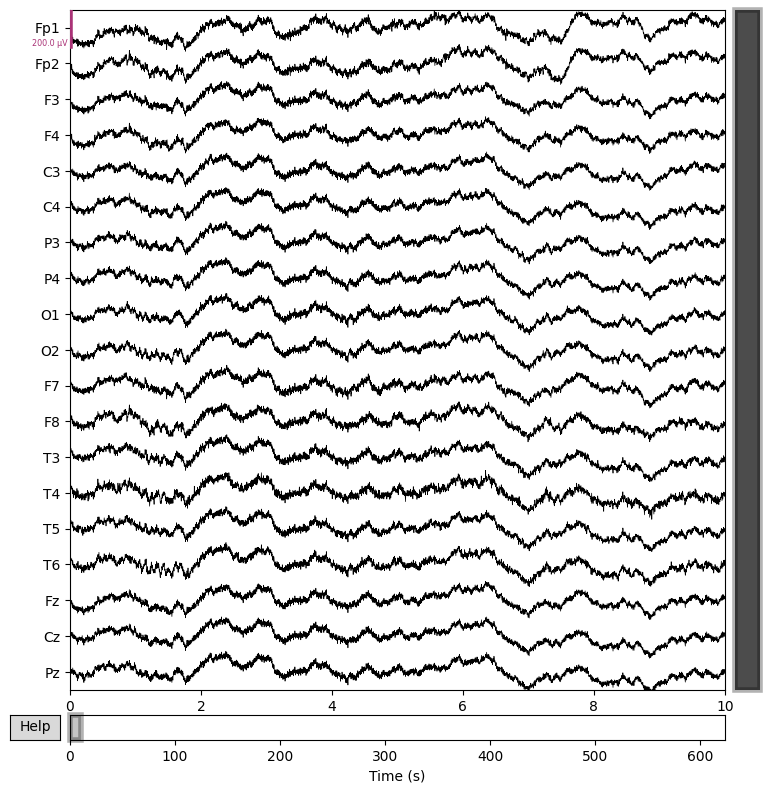

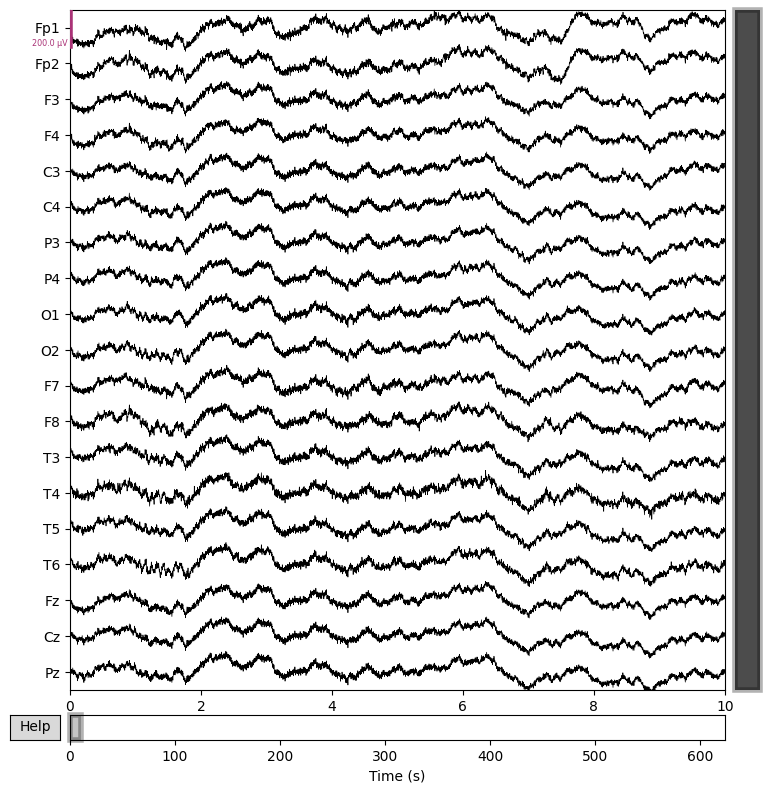

In [7]:
sig.plot(scalings=dict(eeg=100e-6))

Effective window size : 4.096 (s)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mne/viz/utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


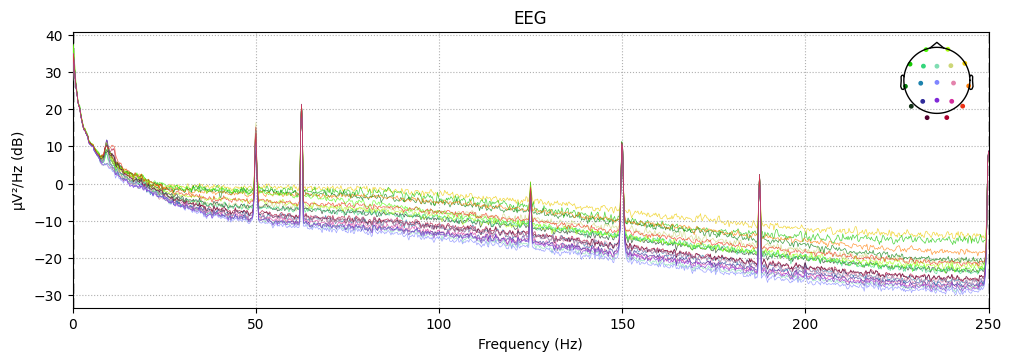

In [8]:
sig.compute_psd().plot()

In [9]:
sig.ch_names

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T3',
 'T4',
 'T5',
 'T6',
 'Fz',
 'Cz',
 'Pz']

NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
Effective window size : 4.096 (s)


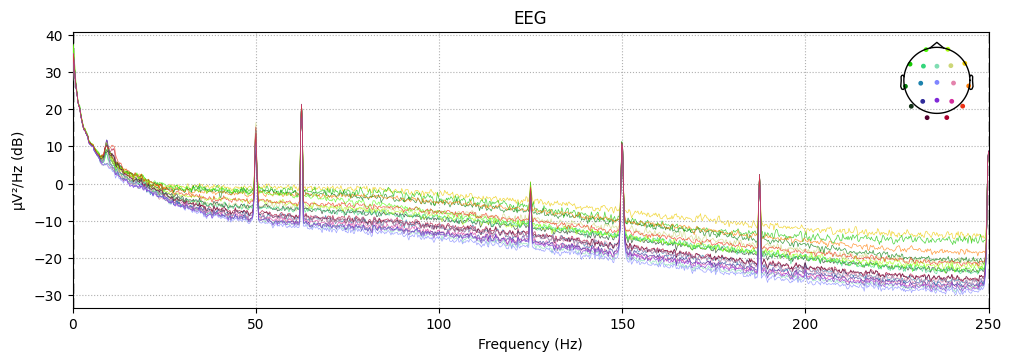

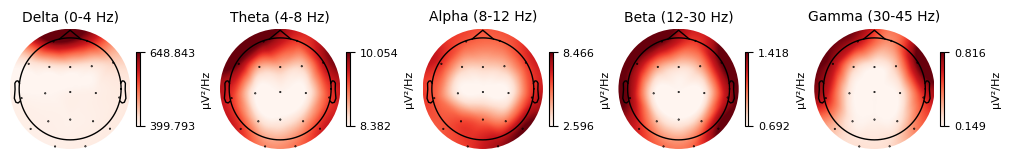

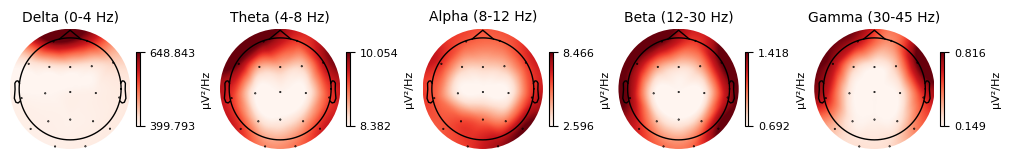

In [10]:
sig.plot_psd_topomap()

In [11]:
sig.to_data_frame()

,time,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T3,T4,T5,T6,Fz,Cz,Pz
0,0.000,-209.960938,-112.109375,144.042969,101.660156,15.820312,-7.128906,37.109371,-15.917969,25.292965,191.992188,1.269531,13.769531,-100.585938,15.332031,-0.292969,34.472652,79.882812,-6.152344,51.953121
1,0.002,-218.896454,-112.646484,139.501953,96.533195,10.791017,-7.861327,31.005859,-16.943359,19.482422,189.990234,1.318360,2.197267,-102.880859,18.408203,-6.591796,36.962887,75.830070,-11.474607,45.849606
2,0.004,-227.685516,-117.724609,130.517578,90.771484,-0.048828,-14.794921,21.435547,-25.537109,9.619141,181.201172,-6.787108,-6.103515,-112.158203,7.275391,-15.576171,23.779297,67.724609,-21.044920,34.033199
3,0.006,-215.820282,-108.496094,139.257812,100.390617,9.863280,-4.003906,31.250000,-15.136719,20.312500,191.992188,1.171875,5.078125,-101.953125,14.746093,-3.906250,33.593750,77.539055,-11.816406,41.992184
4,0.008,-210.107391,-105.810547,139.892578,100.048820,11.962892,-2.001952,32.763672,-12.841796,27.880859,193.701172,3.564454,4.443360,-101.611328,12.939454,0.146485,37.646484,77.880852,-11.279296,41.943356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311795,623.590,22.119141,-22.021477,23.681641,38.037109,43.408203,38.623047,-49.560539,41.162109,38.916016,141.650391,-26.025383,0.341801,-49.462883,-4.931633,-6.298820,7.666016,-26.806633,1.123051,10.791016
311796,623.592,19.580078,-25.537109,18.505859,35.595703,37.744141,46.630859,-53.857422,41.943359,35.009766,138.720703,-29.638672,1.611332,-53.076172,-6.591793,-10.400391,1.708988,-29.150391,-1.123043,8.154297
311797,623.594,34.570312,-26.171875,34.082031,32.714844,50.683594,53.710934,-44.140625,53.417965,44.628906,150.000000,-10.449219,13.867187,-36.132812,6.054688,-3.906250,15.136719,-20.312500,9.375000,20.703123
311798,623.596,40.527344,-19.433594,42.578125,37.792969,56.835937,50.195312,-36.621094,57.421871,53.222656,158.203125,-0.195312,37.402344,-26.367188,11.523438,5.566406,23.242186,-14.355469,14.453125,27.636719
